In [47]:
#Dependencies
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import numpy as np
import scipy.stats as st

In [48]:
data_path = "Resources/FullDataSet.csv"

data_df = pd.read_csv(data_path)
data_df.head()

,Date,Month Abbr,State,Number of Flights,Positive,Daily Positve Increase,Deaths,Daily Death Increase,Total Tested,Daily Test Increase
0,2020-08-24,Aug,Arizona,494,198414,311,4771,0,1155629,6342
1,2020-08-24,Aug,California,1998,668615,4946,12152,18,10652487,111456
2,2020-08-24,Aug,Colorado,941,55143,260,1815,0,938596,8444
3,2020-08-24,Aug,Florida,917,602829,2258,10534,72,4447156,18523
4,2020-08-24,Aug,Georgia,2166,256253,2304,5156,24,2205181,33297


In [49]:
#group Total state metrics (no date layer)
total_df = data_df.groupby(['State'], as_index=False)[['Number of Flights','Daily Positve Increase','Daily Death Increase','Daily Test Increase']].sum()
total_df.head()

,State,Number of Flights,Daily Positve Increase,Daily Death Increase,Daily Test Increase
0,Arizona,27491,36803,1088,519275
1,California,107840,217055,5055,6817739
2,Colorado,48679,33966,251,812431
3,Florida,51929,167520,6008,1393306
4,Georgia,119609,91586,2597,1195650


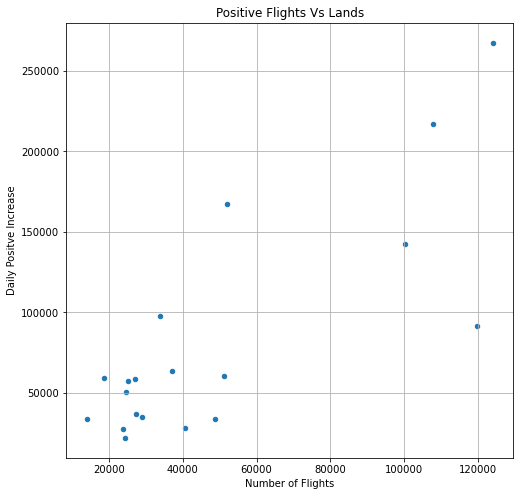

In [50]:
# ScatterPlots
total_df.plot(kind="scatter", x="Number of Flights", y="Daily Positve Increase", grid=True, figsize=(8,8),
              title="Positive Flights Vs Lands")
plt.show()


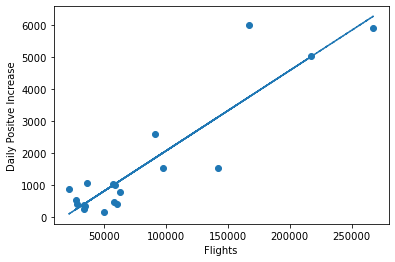

In [54]:
flights = total_df.iloc[:,2]
positive = total_df.iloc[:,3]

fl_slope, fl_int, fl_r, fl_p, fl_std_err = stats.linregress(flights, positive)
fl_fit = fl_slope * flights + fl_int

plt.scatter(flights,positive)
plt.plot(flights,fl_fit,"--")
#plt.xticks(np.arange(min(100), max(300000)))
plt.xlabel('Flights')
plt.ylabel('Daily Positve Increase')
plt.show()


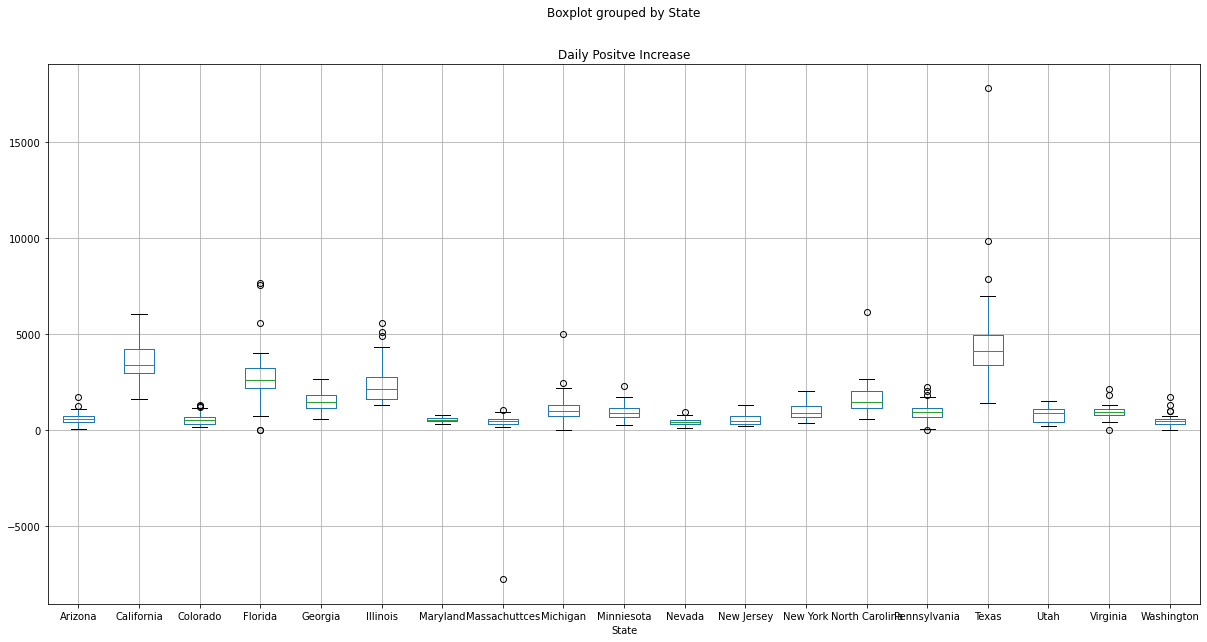

In [55]:
#BoxPlot Positive rates by state
data_df.boxplot("Daily Positve Increase", by="State", figsize=(20, 10))

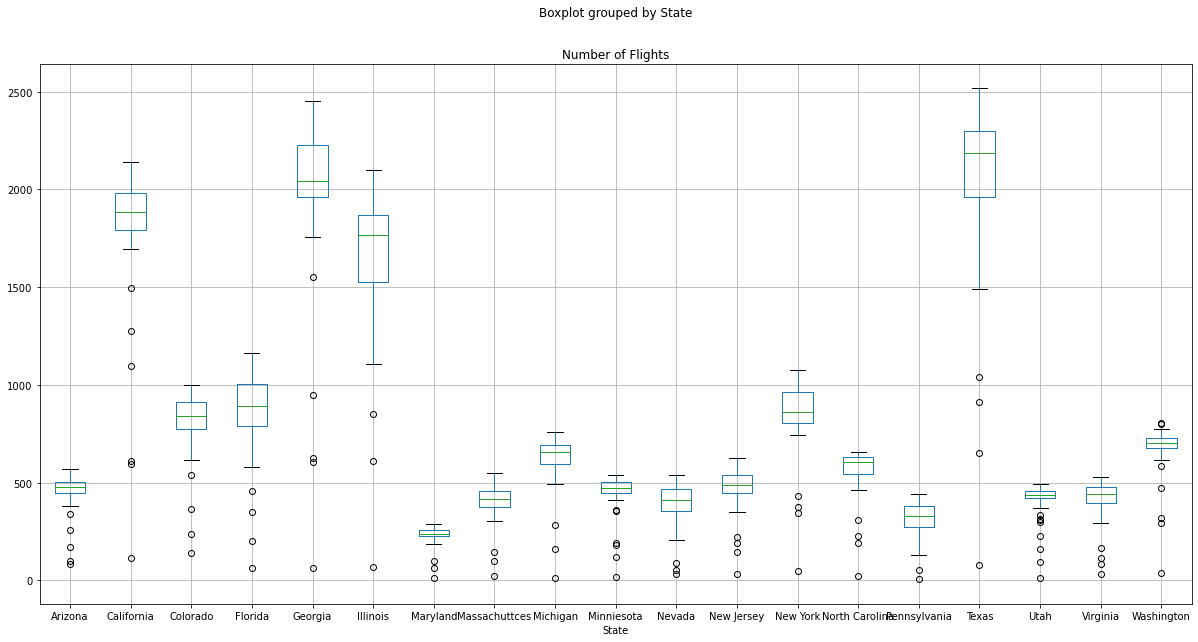

In [56]:
#BoxPlot flights by state
data_df.boxplot("Number of Flights", by="State", figsize=(20, 10))

In [38]:
#correlation of entire base dataset
data_desc = data_df.corr(method = 'pearson')
#data_desc.unstack().sort_values()
data_desc

,Number of Flights,Positive,Daily Positve Increase,Deaths,Daily Death Increase,Total Tested,Daily Test Increase
Number of Flights,1.000000,0.649185,0.589530,0.363813,0.490967,0.511205,0.388523
Positive,0.649185,1.000000,0.717241,0.715332,0.684205,0.805849,0.562690
Daily Positve Increase,0.589530,0.717241,1.000000,0.355680,0.688944,0.511310,0.424103
Deaths,0.363813,0.715332,0.355680,1.000000,0.309911,0.778679,0.633943
Daily Death Increase,0.490967,0.684205,0.688944,0.309911,1.000000,0.395617,0.252095
Total Tested,0.511205,0.805849,0.511310,0.778679,0.395617,1.000000,0.816712
Daily Test Increase,0.388523,0.562690,0.424103,0.633943,0.252095,0.816712,1.000000


In [42]:
#generating the correlation of the columns we actually care about
prep_df = data_df.groupby(['State','Date'], as_index=False)[['Number of Flights','Daily Positve Increase','Daily Death Increase','Daily Test Increase']].sum()
corr_pear = prep_df.corr(method = 'pearson')
corr_pear

,Number of Flights,Daily Positve Increase,Daily Death Increase,Daily Test Increase
Number of Flights,1.000000,0.589530,0.490967,0.388523
Daily Positve Increase,0.589530,1.000000,0.688944,0.424103
Daily Death Increase,0.490967,0.688944,1.000000,0.252095
Daily Test Increase,0.388523,0.424103,0.252095,1.000000
